<a href="https://colab.research.google.com/github/LaithNidal-777/Titanic/blob/main/PSUT_Titanic_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Importing data manipulation and linear algebra libraries
import numpy as np
import pandas as pd

#Importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing machine learning libraries and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis

In [3]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Field (Column) Descriptions

---



1.  `PassengerId` : - primary used to identify records.Redundant for breakdown

2.  `Survived` :- Binary values to show survival. 0: Death , 1: Survived

3.   `Pclass` :- A proxy for socio-economic status (SES)
 **1st = Upper, 2nd = Middle, 3rd = Lower**

4.   `Name` :- The name of each passenger. Redundant for breakdown.
5.   `Sex` :- Male or Female


6.   `Age` :- Float variable denoting age.


7.   `SibSp` :- # of siblings / spouses aboard the Titanic


8.   `Parch` :- # of parents / children aboard the Titanic


9.   `Ticket` :- Ticket number

10.   `Fare` :- Passenger fare
11.   `Cabin` :- Cabin number.


12.   `Embarked`:-	Port of Embarkation **C = Cherbourg, Q = Queenstown, S = Southampton**



[Link to the original dataset data dictionary](https://www.kaggle.com/c/titanic/data)



In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.groupby('Pclass')['Fare'].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Some Obervations from the Summary Statistics

---


*   The mean age of the passengers in the dataset is just under **30 years old**.
*   The mean fare cost was just under **32 pounds**.

The next steps would be some further exploration.



In [8]:
train_df.shape

(891, 12)

In [9]:
test_df.shape

(418, 11)



*   The train dataset is comprised of **12 fields (columns)** and **891 records
(rows)**.
*   The test dataset is comprised of **11 fields (columns)** and **418 records
(rows)**.

The one difference between the train and test dataset is the **`Survived`** field; which is only present in the train dataset. This is our **target field** and what we will be predicting.

The next step would be further exploration of the categorical data types.

**Categorical variables** represent types of data which may be divided into groups. Examples of categorical variables are race, sex, age group, and educational level.



In [10]:
# Breakdown of Categorial Features in the train dataset

categorical_features = ['Pclass', 'Sex', 'Survived', 'Embarked']
for var in categorical_features:
  print(train_df[var].value_counts(),' Percentages (%)',train_df[var].value_counts()/len(train_df)* 100 )

Pclass
3    491
1    216
2    184
Name: count, dtype: int64  Percentages (%) Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64  Percentages (%) Sex
male      64.758698
female    35.241302
Name: count, dtype: float64
Survived
0    549
1    342
Name: count, dtype: int64  Percentages (%) Survived
0    61.616162
1    38.383838
Name: count, dtype: float64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64  Percentages (%) Embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64


# Data Visualization

The next section will focus on highlighting some of the findings from the EDA performed in the previous portion of this notebook.

<Axes: title={'center': 'Proportion of Passenger Classes Onboard the Titanic'}, ylabel='Passenger Class'>

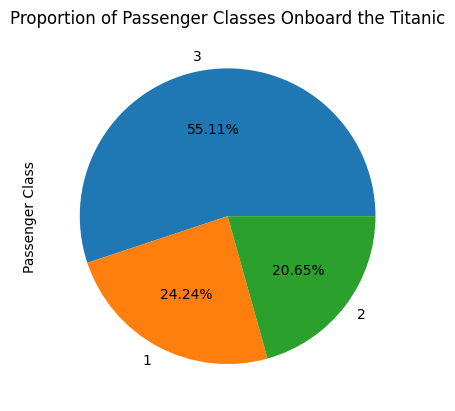

In [11]:
train_df['Pclass'].value_counts().plot(kind = 'pie', label = 'Passenger Class', autopct = '%1.2f%%', title = 'Proportion of Passenger Classes Onboard the Titanic')



*    The passenger class is a categorical category broken down to **1st class**(denoted by a 1) which was **24.24% of passengers**, **2nd class**(denoted by a 2) which was **20.65%** of passengers and **3rd class**(denoted by a 3) which was **55.11%** of passengers. This is a socioeconomic indicator of the passengers in the train dataset.




<Axes: title={'center': 'Proportion of Passenger Gendres Onboard the Titanic'}, ylabel='Gender of the Passengers'>

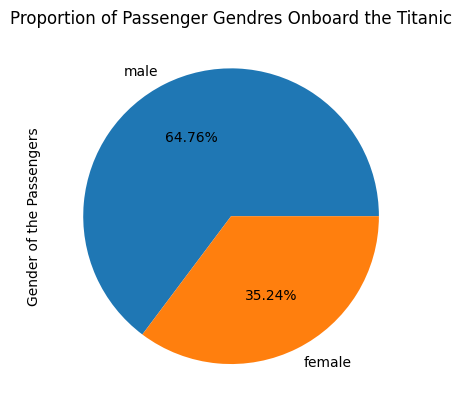

In [12]:
train_df['Sex'].value_counts().plot(kind = 'pie', label = 'Gender of the Passengers', autopct = '%1.2f%%', title = 'Proportion of Passenger Gendres Onboard the Titanic')



*   The passengers on the train dataset were **64.76% male** and **35.24% female.**



<Axes: title={'center': 'Proportion of Passenger Survival Onboard the Titanic'}, ylabel='Survival Rates'>

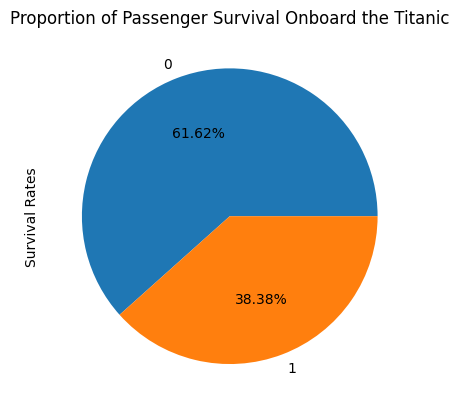

In [13]:
train_df['Survived'].value_counts().plot(kind = 'pie', label = 'Survival Rates', autopct = '%1.2f%%', title = 'Proportion of Passenger Survival Onboard the Titanic')



*   The graph above shows a **38.38% survival rate** and a **61.26% fatality rate**.

The next stage will be visualizing some of the categorical features against our target **Survived** field.



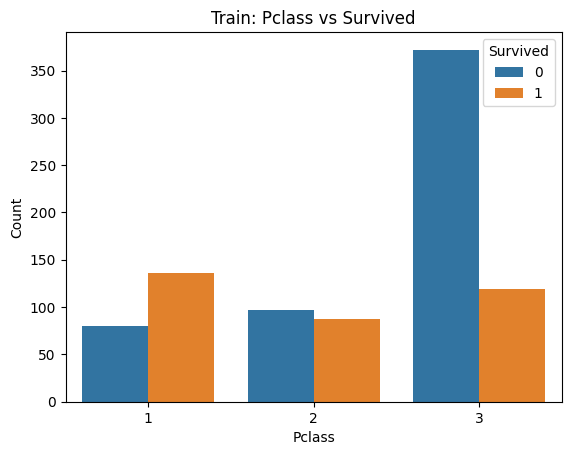

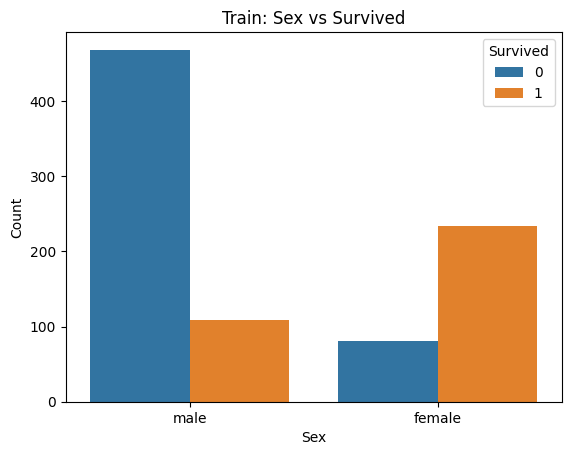

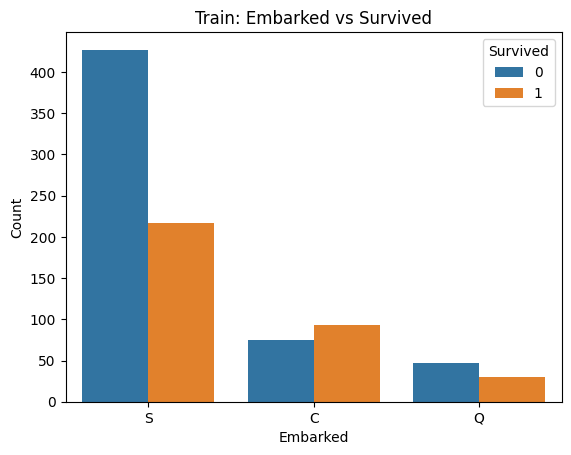

In [14]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
for var in categorical_features:
  sns.countplot(x = var,hue = 'Survived', data = train_df)
  plt.title(f'Train: {var} vs Survived')
  plt.xlabel(f'{var}')
  plt.ylabel('Count')
  plt.show()

In [15]:
# Drop non-numerical columns before calculating correlations
numerical_df = train_df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


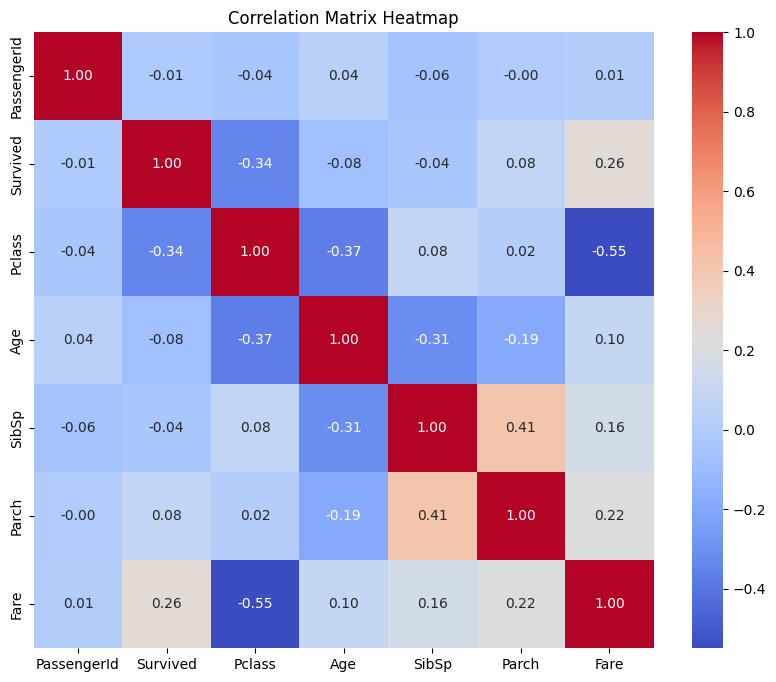

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [17]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0




* **Correlation coeffiecient**  is a metric that measures the extent to which the numeric variables are associated with one another (ranges from -1 to +1).    
* -1 shows a strong negative correlation while + 1 shows a strong positive correlation while 0 signifies a lack of a correlation.


# Data Cleaning
## Handling Null Values

In [18]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


Train Dataset Observations
---
There are three fields containing null values: `Age`, `Cabin` and `Embarked`.
There are many ways to deal with missing data.


*   The `Cabin` field is missing most of its values with 687 records missing out of a possible 891 records. The next logical step would be to drop that field.
*   The `Embarked` field is missing only two records. This is considered a negligible amount, but will be handled via mode imputation

*   The `Age` field is missing 177 fields out of a possible 891 records. The distribution of the values in the column will need to be assessed so I can decided if I would like to use `mean` or `median` imputation.

(*Mean imputation* is usually used for *normally distributed* values while *median imputation* is used for more *skewed* values).


Test Data Set
---

There are also three fields containing null values in the test dataset: `Age`, `Cabin` and `Fare`.

*   The `Cabin` field is missing most of its values with 327 records missing out of a possible 418 records. The next logical step would be to drop that field.

*   The `Fare` field is missing only one record. This is considered a negligible amount, but will be handled via mean imputation.

*   The `Age` field is missing 86 fields out of a possible 418 records. The distribution of the values in the column will need to be assessed so I can decided if I would like to use `mean` or `median` imputation.





Text(0.5, 1.0, 'Histogram of Age (Test)')

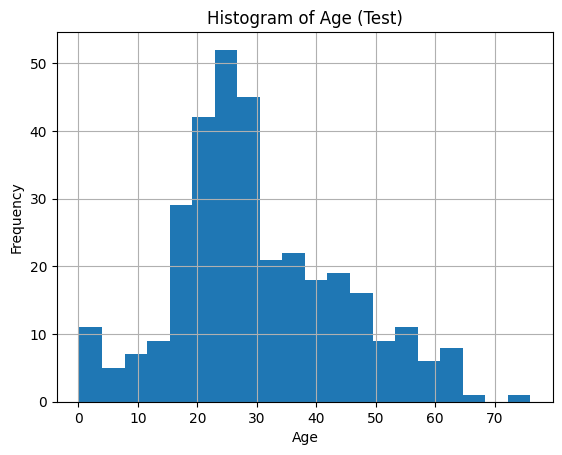

In [20]:
#drawing a histogram of the age column to determine what type of data imputation to choose
test_df['Age'].hist(bins = 20)

# add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (Test)')

Text(0.5, 1.0, 'Histogram of Age (Train)')

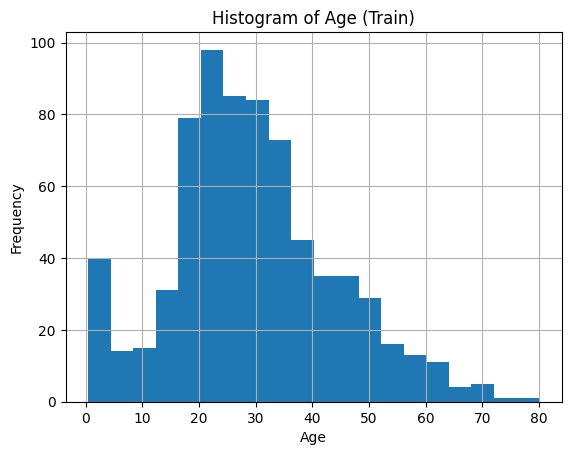

In [21]:
#drawing a histogram of the age column to determine what type of data imputation to choose
train_df['Age'].hist(bins = 20)

# add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (Train)')



The histograms of the passengers ages for both datasets displays a normal distribution.
The missing values for the `Age` field will be addressed via mean imputation. This is will be done using the `fillna()` method. The mean of Age column will be used to fill all null values keeping the overall distribution of the data.

In [22]:
#Addressing 'Age' null values for both datasets
train_df.fillna(train_df['Age'].mean(), inplace = True)
test_df.fillna(test_df['Age'].mean(), inplace = True)

In [23]:
#Addressing 'Fare' null values for test dataset
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [24]:
#Addressing 'Embarked' null values for train dataset
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

The `cabin`, `Ticket`,`PassengerId` and `Name` fields will be dropped so as to streamline the data and remove and inconsistencies.


In [25]:
train_df.drop(['Name','Cabin','Ticket','PassengerId'], axis = 1, inplace = True)
test_df.drop(['Cabin','Ticket','Name','PassengerId'], axis = 1, inplace = True)

In [26]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## Handling Outliers



In [28]:
#Writing function to remove outliers from any numerical column, will be applied to the fare column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [29]:
#Removing outliers form the 'Age' column
train_df_no = remove_outliers(train_df, 'Age')
test_df_no = remove_outliers(test_df, 'Age')

# Checking how many values were removed
print(f"Number of rows removed (train): {len(train_df) - len(train_df_no)}")
print(f"Number of rows removed (test): {len(test_df) - len(test_df_no)}")
print(f'Original train dataset shape: {train_df.shape}')
print(f'New dataset shape: {train_df_no.shape}')
print(f'Original test dataset shape: {test_df.shape}')
print(f'New dataset shape: {test_df_no.shape}')



Number of rows removed (train): 66
Number of rows removed (test): 36
Original train dataset shape: (891, 8)
New dataset shape: (825, 8)
Original test dataset shape: (418, 7)
New dataset shape: (382, 7)


# Data Splitting on Data (with Outliers)

In [30]:
train_df['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
train_df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
test_df['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
test_df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
X_train = train_df.drop('Survived', axis = 1)#Features
y_train = train_df['Survived'] # target

In [46]:
#saving cleaned Dataframes to CSV files
train_df_no.to_csv('/content/drive/My Drive/train_cleaned.csv', index=False)
test_df_no.to_csv('/content/drive/My Drive/test_cleaned.csv', index=False)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [34]:
#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test = scaler.transform(test_df)

# Model Training

## Logistic Regression on Data (with Outliers)

In [35]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.7988826815642458


## Random Forest Classifier on Data (with Outliers)


In [36]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_val)
accuracy_rfc = accuracy_score(y_val, y_pred_rfc)
print(f"Random Forest Classifier Accuracy: {accuracy_rfc}")

Random Forest Classifier Accuracy: 0.8156424581005587



# Data Splitting


In [37]:
train_df_no['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
train_df_no['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
test_df_no['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
test_df_no['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
X_train = train_df_no.drop('Survived', axis = 1)#Features
y_train = train_df_no['Survived'] # target

<ipython-input-37-c447f06ccf00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_no['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
<ipython-input-37-c447f06ccf00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_no['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
<ipython-input-37-c447f06ccf00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_no['Sex'].replace({'male': 0, 'female': 1}, inpla

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [39]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test = scaler.transform(test_df_no)

# Model Training

## Logistic Regression

In [40]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.8242424242424242


## Random Forest Classifier



In [41]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_val)
accuracy_rfc = accuracy_score(y_val, y_pred_rfc)
print(f"Random Forest Classifier Accuracy: {accuracy_rfc}")

Random Forest Classifier Accuracy: 0.8181818181818182
